# Logistic Regression

https://www.vebuso.com/2020/02/linear-to-logistic-regression-explained-step-by-step/

https://towardsdatascience.com/an-introduction-to-logistic-regression-8136ad65da2e
    

Essentially, it is a classification model based on probability, thus it has a [0,1] range. Linear regression is turned into logistic regression with the sigmoid function.

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [2]:
dataset = pd.read_csv('C:\\Users\\momoa\\OneDrive\\Desktop\\thesocialnetwrok.csv')
x= dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x[0:5])
print(' ')
print(y[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
 
[0 0 0 0 0]


## Splitting the Dataset

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

## Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.transform(xtest)

In [6]:
print(xtrain[0:5])

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]]


In [7]:
print(xtest[0:5])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]]


## Training the logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression(random_state=42)
cl.fit(xtrain, ytrain)

LogisticRegression(random_state=42)

## Predicting a new result

In [9]:
print(cl.predict(scx.transform([[30,87000]])))

[0]


## Predicting test set results

In [10]:
ypred = cl.predict(xtest)
concatenation = np.concatenate((ypred, ytest), 0)
concatenation = np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest), 1)), 1)
print(concatenation[0:20])

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]]


## Creating the confusion matrix

A confusion matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

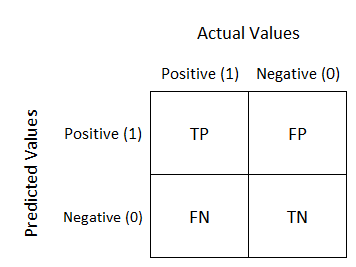

In [11]:
from PIL import Image
c = Image.open('C:\\Users\\momoa\\OneDrive\\Desktop\\Certificates\\1_Z54JgbS4DUwWSknhDCvNTQ.png')
c

what it should look like ^^

In [12]:
from sklearn.metrics import confusion_matrix
matr = confusion_matrix(ytest, ypred)
print(matr)

[[61  2]
 [12 25]]


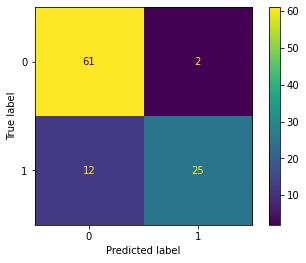

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(matr).plot()

61 correct predictions of 0 (not buying), 2 incorrect predictions of 1 (buying).

12 incorrect predictions of 0 (not buying), 25 correct predictions of 1.

## Computing model's accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.86

## Visualizing training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


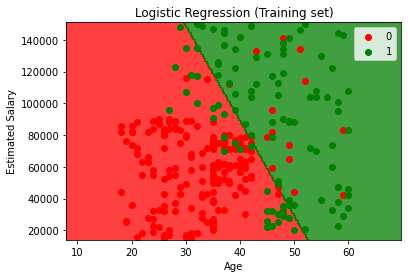

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = scx.inverse_transform(xtrain), ytrain
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, cl.predict(scx.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing testing set results

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = scx.inverse_transform(xtest), ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, cl.predict(scx.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 1.92 GiB for an array with shape (2, 128960000) and data type float64